# Explore

In [21]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import os
from pprint import pprint
from datetime import datetime as dt


def get_news_articles():
    url = "https://inshorts.com/en/read"
    # set different categories to perse through
    category = ["business", "sports", "technology", "entertainment"]

    articles = {}
    df_setup = []
    for cat in category:
        # read the url
        res = get(url + "/" + category[0])
        print(res)

        # create a beautiful soup object
        soup_parser = BeautifulSoup(res.content, 'html.parser').body

        soup = soup_parser.find_all("span", itemprop="mainEntityOfPage")
        for i in range(len(soup)):
            link = soup[i]["itemid"]

            article = get(link)
            article_soup = BeautifulSoup(article.content,"html.parser").body

            article_title = article_soup.find('span', itemprop='headline').text
            article_body = article_soup.find('div', itemprop='articleBody').text
            # articles[f"article {cat} {i}"] = [article_title, cat ,link ,article_body]

            article_instance = {
                'title': article_title,
                'content': article_body,
                'category': cat,
            }

            df_setup.append(article_instance)
    return pd.DataFrame(df_setup)

In [23]:
rating = get_news_articles()

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


**prep data**

In [24]:
train, val, test = wrangle.prep_readmes(rating, "content")

In [25]:
# Generate random numbers between 1 and 5
random_numbers = np.random.randint(1, 6, size=len(train))
train["stars"] = random_numbers
train.head(2)

,title,content,category,cleaned_content,lemmatized,stars
4,US GDP growth revised down to 2.1% annual rate...,The US economy grew at 2.1% annual pace in the...,business,the us economy grew at 21 annual pace in the s...,u economy grew 21 annual pace second quarter i...,5
11,Court rejects 4B Networks' Rahul Yadav's antic...,A Mumbai court on Wednesday denied 4B Networks...,sports,a mumbai court on wednesday denied 4b networks...,mumbai court wednesday denied 4b networks' rah...,4


**Bigram generator**

In [38]:
def generate_bigrams(lemmatized):
    words = lemmatized.split()
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            bigram = " ".join(words[i:i+2])
            bigrams.append(bigram)

    return bigrams

In [39]:
pros_bigrams = generate_bigrams(" ".join(train.lemmatized.values))
cons_bigrams = generate_bigrams(" ".join(train.lemmatized.values))
# add list of bigrams to a dataframe
pros_bigrams = pd.DataFrame({'all_pros_bigrams': pros_bigrams})
cons_bigrams = pd.DataFrame({'all_cons_bigrams': cons_bigrams})
pros_bigrams.head(3)

,all_pros_bigrams
0,economy grew
1,grew 21
2,21 annual


1. **Are there differences in word/words distribution between different binned star rating categories?**

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

In [40]:
# Define bin edges
bin_edges = [0, 1, 2, 3, 4, 5]

# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four', "Five"]

# Bin the 'Values' column
train['binned_tars'] = pd.cut(train['stars'], bins=bin_edges, labels=bin_labels)
train.head(2)

,title,content,category,cleaned_content,lemmatized,stars,binned_tars
4,US GDP growth revised down to 2.1% annual rate...,The US economy grew at 2.1% annual pace in the...,business,the us economy grew at 21 annual pace in the s...,u economy grew 21 annual pace second quarter i...,5,Five
11,Court rejects 4B Networks' Rahul Yadav's antic...,A Mumbai court on Wednesday denied 4B Networks...,sports,a mumbai court on wednesday denied 4b networks...,mumbai court wednesday denied 4b networks' rah...,4,Four


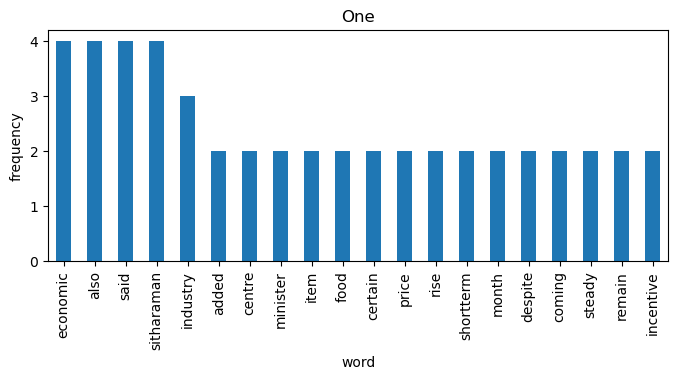

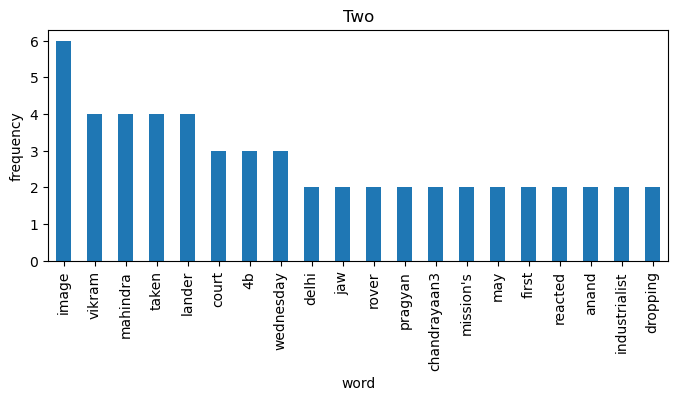

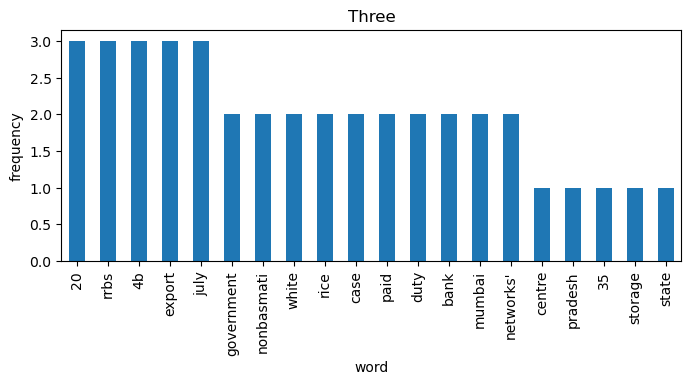

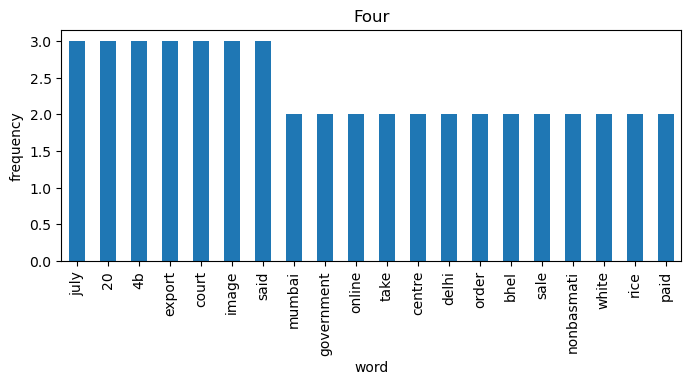

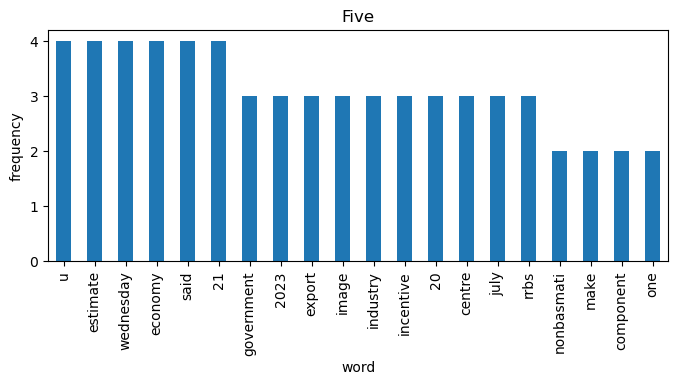

In [55]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.lemmatized[train.binned_tars == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.title(i)
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()


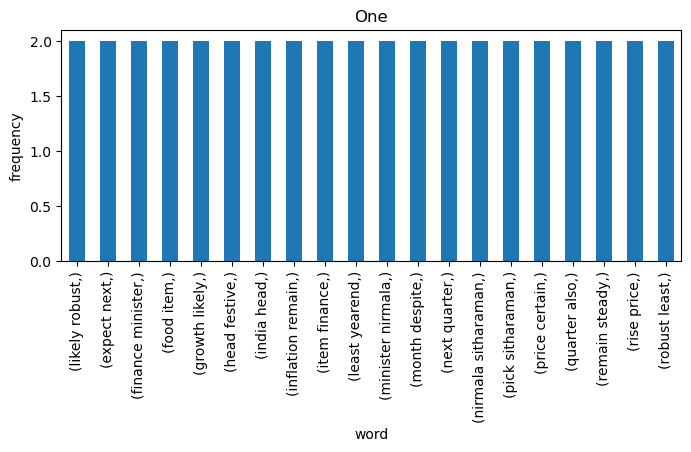

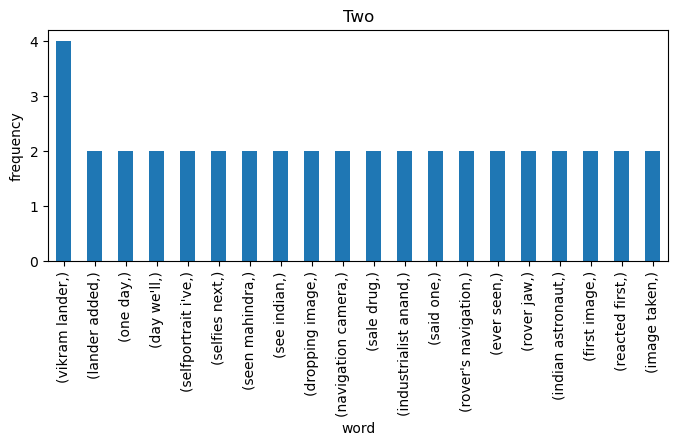

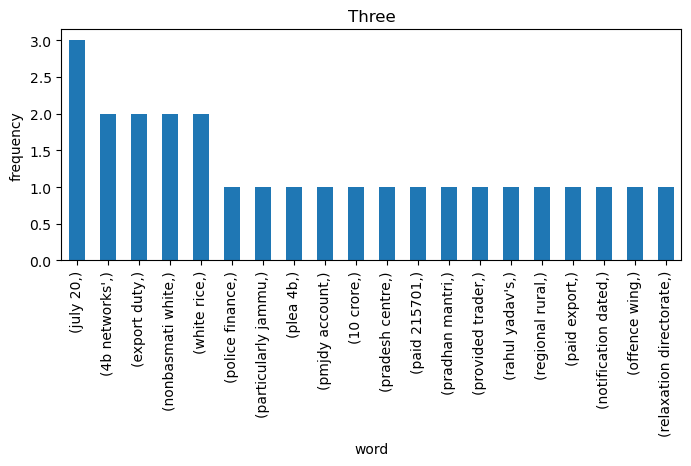

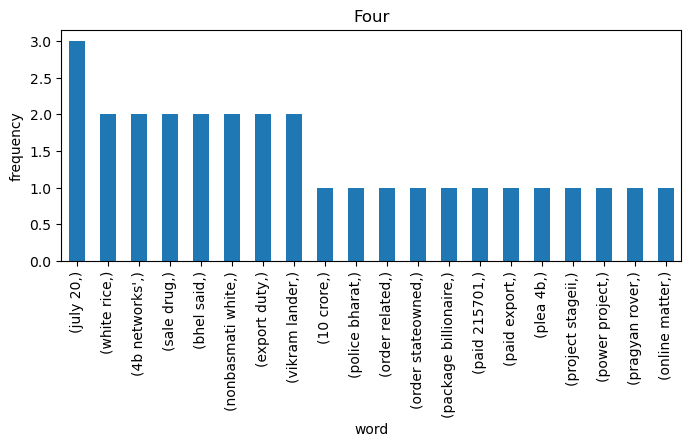

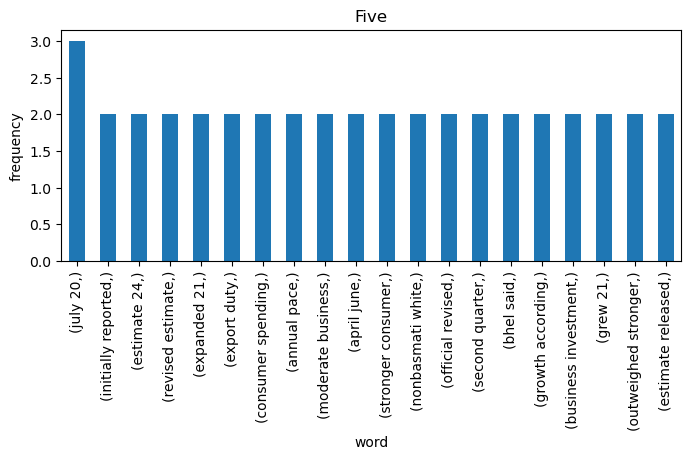

In [56]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.lemmatized[train.binned_tars == i]
    bigram = generate_bigrams(" ".join(bin_data.values))
    bigram_df = pd.DataFrame({'star_bigrams': bigram})
    
    
    # Calculate word counts
    pd.Series(bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(i)
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

**2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?**
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

**pros**

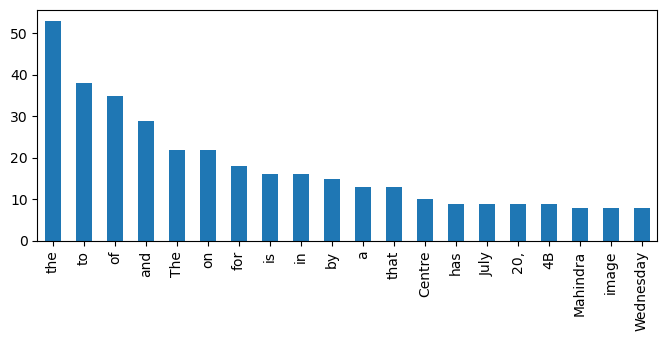

In [42]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.content).split()).value_counts().head(20).plot(kind="bar")
plt.show()

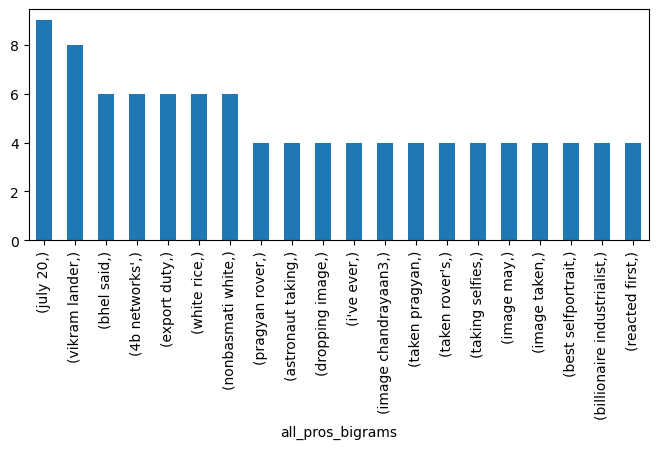

In [43]:
plt.figure(figsize=(8,3))
pd.Series(pros_bigrams.value_counts().head(20).plot(kind="bar"))
plt.show()

**cons**

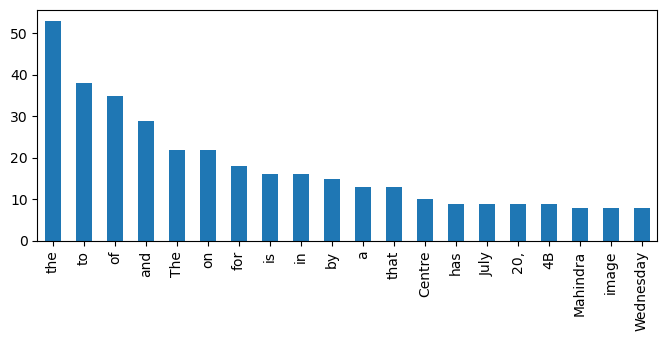

In [44]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.content).split()).value_counts().head(20).plot(kind="bar")
plt.show()

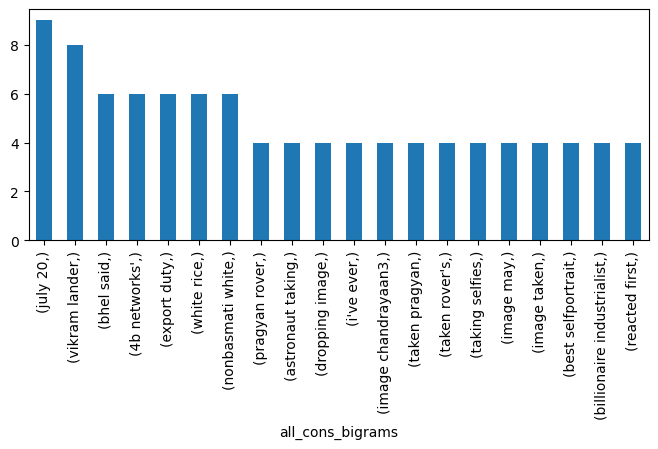

In [45]:
plt.figure(figsize=(8,3))
pd.Series(cons_bigrams.value_counts().head(20).plot(kind="bar"))
plt.show()

3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

**pros**

In [ ]:
# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four', "Five"]

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

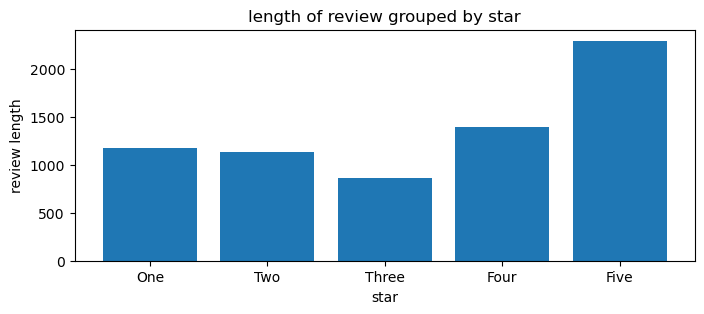

In [62]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.lemmatized[train.binned_tars == i]
    len_start_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_start_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
# pd.Series(bigram_df.grou().head(20).plot(kind="bar"))
plt.title("length of review grouped by star")
plt.xlabel("star")
plt.ylabel("review length")
plt.show()

**cons**

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

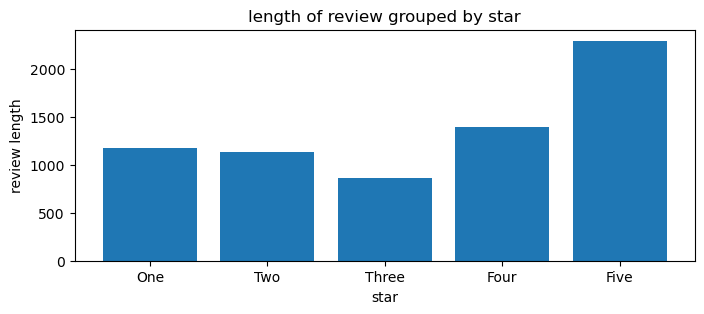

In [61]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    # Filter data for the current bin label
    bin_data = train.lemmatized[train.binned_tars == i]
    len_start_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_start_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
# pd.Series(bigram_df.grou().head(20).plot(kind="bar"))
plt.title("length of review grouped by star")
plt.xlabel("star")
plt.ylabel("review length")
plt.show()

4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?
- Combine the pros and cons for each star

In [66]:
# Define bin labels
low_bin_labels = ['One', 'Two', 'Three']
high_bin_labels = ['Four', 'Five']

**low stars and positive sentiment**

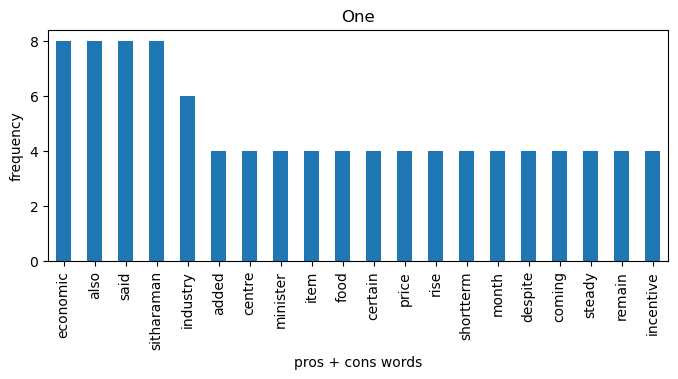

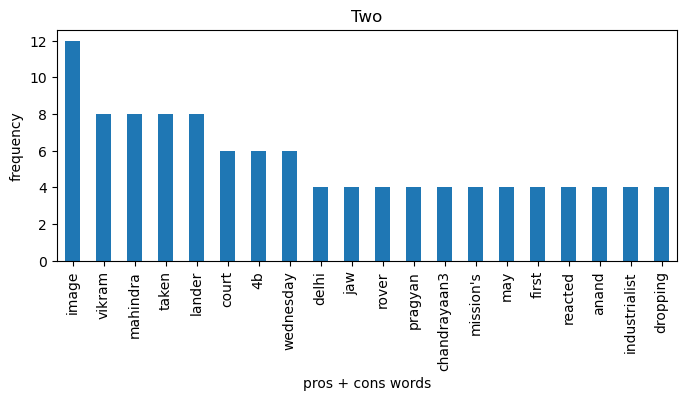

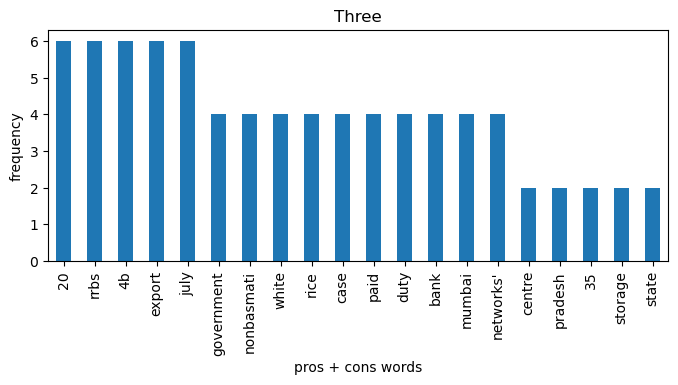

In [76]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.lemmatized[train.binned_tars == i].values)
    cons = " ".join(train.lemmatized[train.binned_tars == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(i)
    plt.xlabel("pros + cons words")
    plt.ylabel("frequency")
    plt.show()


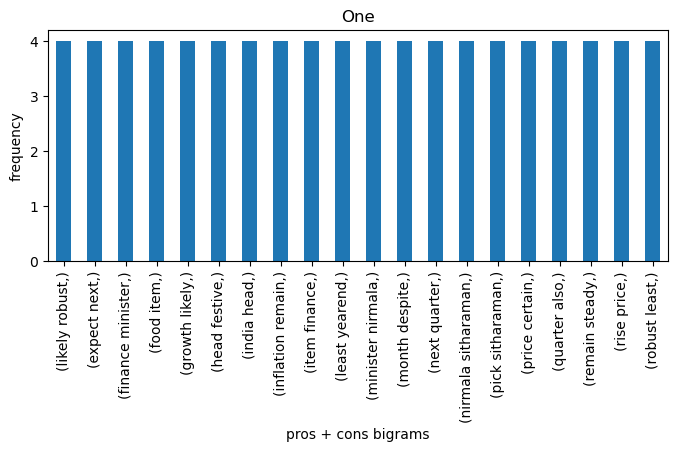

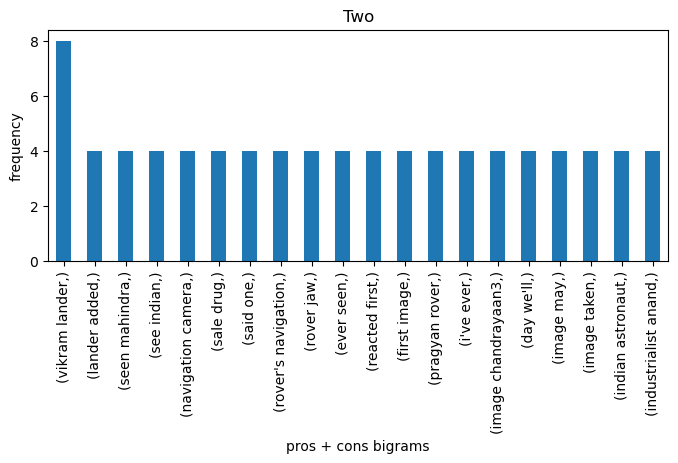

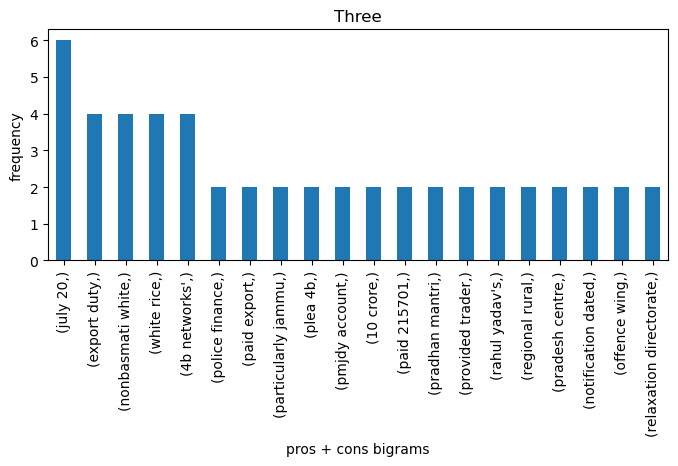

In [82]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.lemmatized[train.binned_tars == i].values)
    cons = " ".join(train.lemmatized[train.binned_tars == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(i)
    plt.xlabel("pros + cons bigrams")
    plt.ylabel("frequency")
    plt.show()


**high stars and negative sentiment**

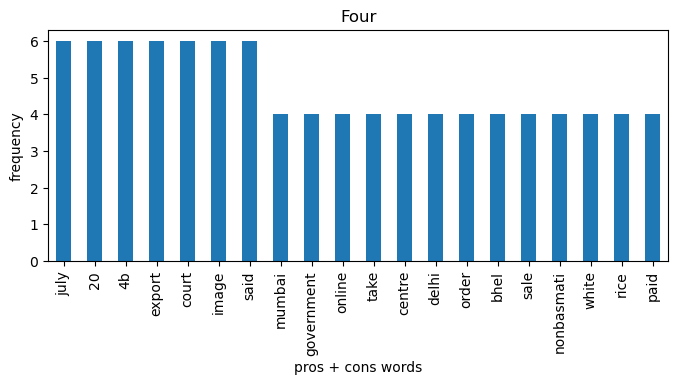

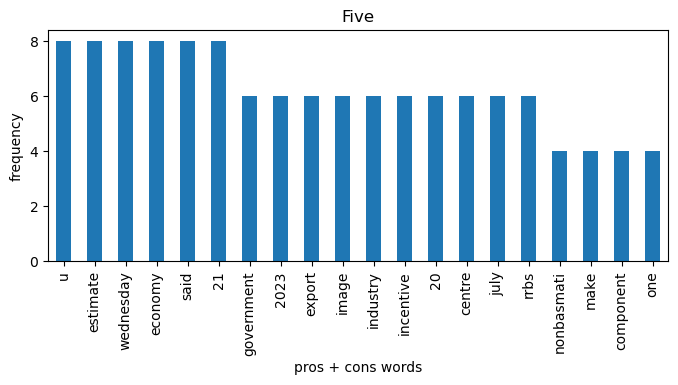

In [79]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.lemmatized[train.binned_tars == i].values)
    cons = " ".join(train.lemmatized[train.binned_tars == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(i)
    plt.xlabel("pros + cons words")
    plt.ylabel("frequency")
    plt.show()

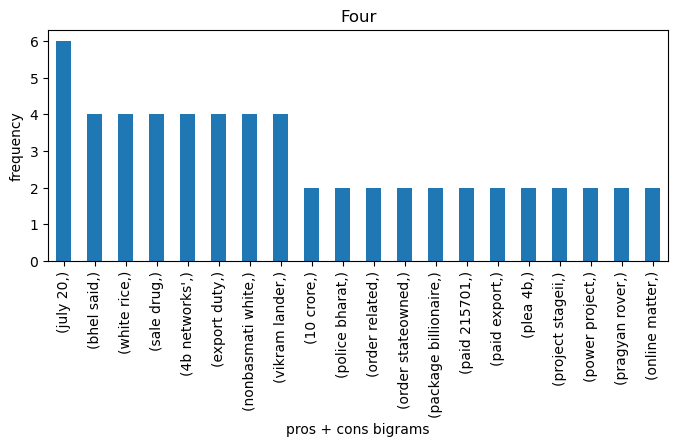

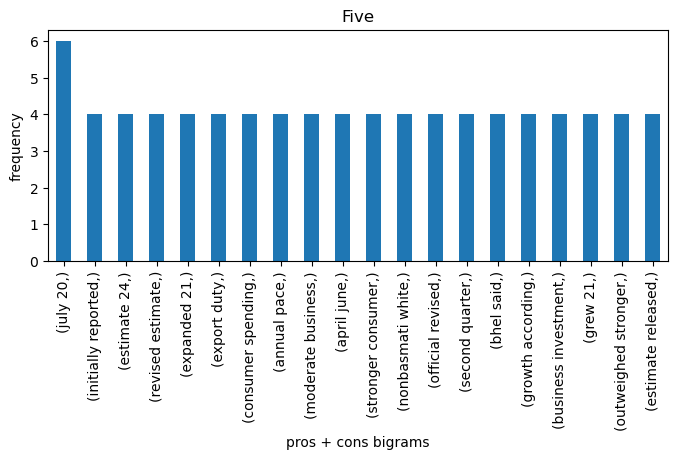

In [84]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.lemmatized[train.binned_tars == i].values)
    cons = " ".join(train.lemmatized[train.binned_tars == i].values)
    pros_cons = pros + " " + cons
    # split into bigrams
    pros_cons_bigram = generate_bigrams(pros_cons)
    pros_cons_bigram_df = pd.DataFrame({'pros cons bigram': pros_cons_bigram})
    
    # Calculate word counts
    pd.Series(pros_cons_bigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(i)
    plt.xlabel("pros + cons bigrams")
    plt.ylabel("frequency")
    plt.show()